#DATASET PROCESSING

In [ ]:
BASE_PATH = '/content/drive/MyDrive/Cryptofuture'

In [ ]:
import os
import pandas as pd

df = pd.read_csv(os.path.join(BASE_PATH, 'traindata.csv'), encoding='latin')
df.columns = ['sentiment', 'id', 'date', 'flag', 'user', 'text']

df.sample(n=10)

In [ ]:
# Removing unnecessary rows

clean_df = df[['text', 'sentiment']]
clean_df.sample(n=10)

,text,sentiment
799860,@liiveguddiebadd im ok.. i been mad busy the p...,0
101873,I just made pancakes that didn't burn. But I g...,0
164838,@Keitakeita girl you stay inviting me but not ...,0
594055,@MusicMistress90 oh....lol i feel dumb,0
1540371,Hey @mbreitweiser i like the work so far. (m...,4
1573803,im in class and im bored :S,4
440471,HAHA. @shwood convinced me to try friendorfoll...,0
1227788,@MothmanJim Very thrilled,4
82649,@noreenjuliano bahhhhh i cant watch the video,0
142479,I hate my family They don't understand me,0


In [ ]:
# Normalizing the sentiments in range 0-1

clean_df['sentiment'] = clean_df.sentiment.apply(lambda x: 1 if x == 4 else 0)

clean_df.sample(n=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,text,sentiment
958261,"oooh, work in two hours.. theres something ver...",1
1534755,@DeeHarlemgrlEb lol briiight and eeaarlly liik...,1
930498,"@CHRIS_Daughtry dl'd the song on my comp, have...",1
765815,ugggggh i wish josh would go to the drive in! ...,0
325681,It cut off in 'More Than Just A Werewolf' too ...,0
503520,kinda awkward when u go COMMANDO &amp; ur baby...,0
456473,@Tatiana_K nah I sat this one out. everybody's...,0
560306,No iPhone 3.0 update yet. Looks like I'll ha...,0
1583539,"@mizzorange,... its confirm we're goin to Bali...",1
192531,"@croarty not really tired, less than good wee...",0


In [ ]:
import re

def cleanup_text(text):
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r' +', ' ', text)
    text = re.sub(r'\n', ' ', text)

    return text

In [ ]:
clean_df['text'] = clean_df.text.apply(cleanup_text)

clean_df.sample(n=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,sentiment
480467,praying for my friends Dad,0
881714,Prom was freakin awesome I had a GREAT night,1
1233727,ok i gtg i need to sleep eventhough tomorrow S...,1
147479,amyrachel1911 try to have fun x,0
1091935,fickleticks sorry girl i m like blur abt twit...,1
434837,GlobalGrind How is an ex stripper freak who p...,0
478365,Anela19 LOL I will post some better ones I am...,0
1051258,faulko1 Well hello there,1
1267517,I am soooo ready for tomorrow It s gonna be aw...,1
47876,And people remain here I don t think they are...,0


In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(clean_df, test_size=0.1, random_state=42, shuffle=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


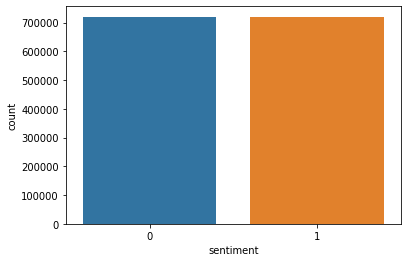

In [ ]:
# Checking balance

import seaborn as sns

sns.countplot(train_df.sentiment)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


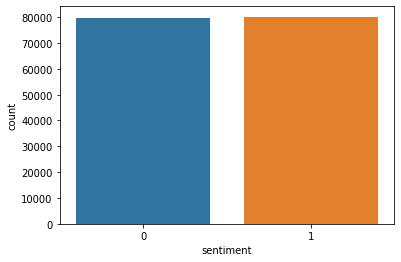

In [ ]:
sns.countplot(test_df.sentiment)

In [ ]:
# Saving the dataframes

train_data = train_df.to_csv(os.path.join(BASE_PATH, 'train_data.csv'), index=False)
test_data = test_df.to_csv(os.path.join(BASE_PATH, 'test_data.csv'), index=False)

In [ ]:
import os
import pandas as pd

tr_df = pd.read_csv(os.path.join(BASE_PATH, 'train_data.csv'))
tr_df.head()

,text,sentiment
0,just saw your picture and my heart melted,1
1,Hyperfludd Needs less age restriction,0
2,laurenredhead No problem These boxes are _mad...,1
3,Mad that the cavs r losing but still love Lebron,0
4,AmandaPatchin See you next time,0


In [ ]:
ts_df = pd.read_csv(os.path.join(BASE_PATH, 'test_data.csv'))
ts_df.head()

,text,sentiment
0,Nkluvr4eva My poor little dumpling In Holmdel...,0
1,I m off too bed I gotta wake up hella early to...,0
2,I havent been able to listen to it yet My spea...,0
3,now remembers why solving a relatively big equ...,0
4,Ate too much feel sick,0


#DATA PREPROCESSING

In [ ]:
import os
import pandas as pd
import numpy as np
import torch
import spacy
import torchtext
from torchtext.legacy import data
import random

In [ ]:
from torchtext.legacy.data import Field

Text = Field(
    tokenize='spacy',
    batch_first=True,
    include_lengths=True,
    fix_length=100,
)

Sentiment = Field(
    sequential=False,
    use_vocab=False,
    pad_token=None,
    unk_token=None
)

In [ ]:
# Connecting Field objects to their respective columns

fields = (('text', Text), ('sentiment', Sentiment))

In [ ]:
from torchtext.legacy.data import TabularDataset

In [ ]:
train_dataset, test_dataset = TabularDataset.splits(
    path=BASE_PATH,
    train='train_data.csv',
    test='test_data.csv',
    format='csv',
    fields=fields,
    skip_header=True
)

In [ ]:
print(vars(train_dataset[0]))
print(vars(test_dataset[0]))

{'text': ['just', 'saw', 'your', 'picture', 'and', 'my', 'heart', 'melted'], 'sentiment': '1'}
{'text': [' ', 'Nkluvr4eva', 'My', 'poor', 'little', 'dumpling', 'In', 'Holmdel', 'vids', 'he', 'was', 'really', 'trying', 'Hope', 'he', 'do', 'nt', 'try', 'to', 'hard', 'tonight', 'xx'], 'sentiment': '0'}


In [ ]:
train_dataset, valid_dataset = train_dataset.split(split_ratio=0.8, random_state=random.seed(42))

In [ ]:
# Text.build_vocab(train_dataset, valid_dataset, max_size=5000)
# Sentiment.build_vocab(train_dataset)

In [ ]:
# Text.vocab

In [ ]:
# len(Text.vocab.stoi)

In [ ]:
# len(Sentiment.vocab.stoi)

In [ ]:
# Sentiment.vocab.stoi

In [ ]:
from torchtext import vocab

embeddings = vocab.Vectors('glove.twitter.27B.100d.txt', BASE_PATH)

Text.build_vocab(train_dataset, valid_dataset, max_size=5000, vectors=embeddings)
Sentiment.build_vocab(train_dataset)

In [ ]:
# Setting up GPU

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (train_dataset, valid_dataset, test_dataset),
    batch_size=50,
    sort_key = lambda x: len(x.text),
    sort_within_batch=True,
    device=device
)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class CnnModel(nn.Module):
    def __init__(self, vocab_size, embed_size, num_filters, filter_sizes, output_classes, dropout):
        super().__init__()
        self.vocab_size = vocab_size
        self.embed_size = embed_size
        self.num_filters = num_filters
        self.filter_sizes = filter_sizes
        self.output_classes = output_classes
        self.dropout = dropout

        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.convs = nn.ModuleList([
                                    nn.Conv2d(
                                        in_channels=1, 
                                        out_channels=num_filters,
                                        kernel_size=(fs, embed_size)) 
                                    for fs in filter_sizes
        ])
        self.fc = nn.Linear(len(filter_sizes) * num_filters, output_classes)
        self.dropout = nn.Dropout(dropout)

    def forward(self, text, text_lengths):
        embedded = self.embedding(text)
        embedded = embedded.unsqueeze(1)

        conved = [F.relu(conv(embedded)).squeeze(3) for conv in self.convs]
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]

        cat = self.dropout(torch.cat(pooled, dim=1))
        return self.fc(cat)

In [ ]:
vocab_size = len(Text.vocab)
embed_size = 100
num_filters = 100
filter_sizes = [3, 4, 5]
output_classes = 2
dropout = 0.8

model = CnnModel(vocab_size, embed_size, num_filters, filter_sizes, 
                 output_classes, dropout)

model = model.to(device)

In [ ]:
print(model)

CnnModel(
  (embedding): Embedding(5002, 100)
  (convs): ModuleList(
    (0): Conv2d(1, 100, kernel_size=(3, 100), stride=(1, 1))
    (1): Conv2d(1, 100, kernel_size=(4, 100), stride=(1, 1))
    (2): Conv2d(1, 100, kernel_size=(5, 100), stride=(1, 1))
  )
  (fc): Linear(in_features=300, out_features=2, bias=True)
  (dropout): Dropout(p=0.8, inplace=False)
)


In [ ]:
import torch.optim as optim

In [ ]:
optimizer = optim.Adam(model.parameters())
# Criterion = loss_function
criterion = nn.CrossEntropyLoss()

criterion = criterion.to(device)

In [ ]:
def accuracy(probs, target):
    prediction = probs.argmax(dim=1)
    corrects = (prediction == target)
    accuracy = corrects.sum().float() / float(target.size(0))
    return accuracy

In [ ]:
def train(model, iterator, optimizer, criterion):
    epoch_loss = 0
    epoch_acc = 0
    for batch in iterator:
        optimizer.zero_grad()
        text, text_lengths = batch.text
        predictions = model(text, text_lengths)
        loss = criterion(predictions, batch.sentiment.squeeze())
        acc = accuracy(predictions, batch.sentiment)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def evaluate(model, iterator, criterion):
    epoch_loss = 0
    epoch_acc = 0
    model.eval()
    with torch.no_grad():
        for batch in iterator:
            text, text_lengths = batch.text
            predictions = model(text, text_lengths).squeeze(1)
            loss = criterion(predictions, batch.sentiment)
            acc = accuracy(predictions, batch.sentiment)
            epoch_loss += loss.item()
            epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def run_train(epochs, model, train_iterator, valid_iterator, optimizer, criterion, model_type):
    best_valid_loss = float('inf')

    for epoch in range(epochs):

        # train the model
        train_loss, train_acc = train(model, train_iterator,    optimizer, criterion)

        # evaluate the model
        valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)

        # save the best model
        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            torch.save(model.state_dict(), 'saved_weights'+'_'+model_type+'.pt')

        print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc * 100:.2f}%')
        print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc * 100:.2f}%')

In [ ]:
run_train(10, model, train_iterator, valid_iterator, optimizer, criterion, 'Convolutional')

	Train Loss: 0.519 | Train Acc: 75.18%
	 Val. Loss: 0.453 |  Val. Acc: 79.00%
	Train Loss: 0.426 | Train Acc: 80.40%
	 Val. Loss: 0.418 |  Val. Acc: 80.83%
	Train Loss: 0.406 | Train Acc: 81.52%
	 Val. Loss: 0.415 |  Val. Acc: 81.16%
	Train Loss: 0.392 | Train Acc: 82.29%
	 Val. Loss: 0.414 |  Val. Acc: 81.08%
	Train Loss: 0.377 | Train Acc: 83.09%
	 Val. Loss: 0.420 |  Val. Acc: 80.94%
	Train Loss: 0.362 | Train Acc: 83.91%
	 Val. Loss: 0.438 |  Val. Acc: 80.72%
	Train Loss: 0.347 | Train Acc: 84.71%
	 Val. Loss: 0.445 |  Val. Acc: 80.73%
	Train Loss: 0.332 | Train Acc: 85.43%
	 Val. Loss: 0.462 |  Val. Acc: 80.31%
	Train Loss: 0.318 | Train Acc: 86.15%
	 Val. Loss: 0.485 |  Val. Acc: 80.17%
	Train Loss: 0.306 | Train Acc: 86.75%
	 Val. Loss: 0.505 |  Val. Acc: 79.85%
